## PCA主成分分析
两个思路：
- 最大投影方差：样本在超平面得投影尽可能地分开
- 最小重构距离：样本到超平面得距离足够近

算法流程：
![](https://gitee.com/wubmu/image/raw/master/img/20220329210516.png)

In [14]:
# 上述算法流程中X(d,m) d
import numpy as np
#造伪样本
X=np.linspace(0,10,100)
Y=3*X+2
X+=np.random.normal(size=(X.shape))*0.3#添加噪声
data=np.c_[X,Y]

Text(0, 0.5, 'y')

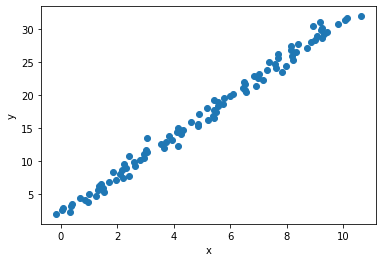

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(data[:,0],data[:,1])
plt.xlabel('x')
plt.ylabel('y')

In [16]:
# 1.去中心化
data_norm = data - np.mean(data,axis=0, keepdims=True)

# 2. 计算协方差
data_cov = (1/(data.shape[0]-1) ) * np.dot(data_norm.T,data_norm)
# data_cov,np.cov(data, rowvar=False) bias标准化N 还是N-1

#3.特征值分解
eig_vals, eig_vecs = np.linalg.eig(data_cov)


Text(0, 0.5, 'y')

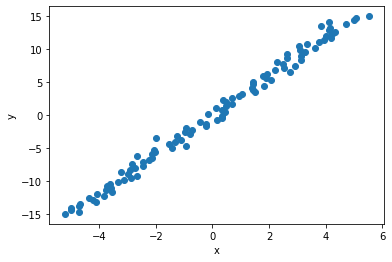

In [17]:
plt.scatter(data_norm[:,0],data_norm[:,1])
plt.xlabel('x')
plt.ylabel('y')

In [5]:
data_cov

array([[ 3.68436204, -3.13734162],
       [-3.13734162,  2.92697165]])

In [6]:
eig_vals, eig_vecs 

(array([6.46578116, 0.14555253]), array([[ 0.74827666,  0.6633868 ],
        [-0.6633868 ,  0.74827666]]))

In [7]:
# 选择特征值最大的
sorted_index = np.argsort(-1*eig_vals) # 从大到小

# 选择前K个特征
K = 1 

eig_vecs = eig_vecs[:,sorted_index]
eig_vecs = eig_vecs[:,:K]

# 
new_data = np.dot(data_norm, eig_vecs)
# eig_vals = eig_vals[sorted_index]
# eig_vecs = eig_vecs[]

现在的特征矩阵，第一列是第一主成分，第二列是第二主成分

In [8]:
new_data[:10]

array([[-1.02002939],
       [-1.38934534],
       [ 3.98472531],
       [-1.30124436],
       [-0.94461482],
       [-0.22741052],
       [ 1.60721513],
       [-1.36273795],
       [ 4.39073848],
       [ 2.04437049]])

np.cov

## Sklearn 实现PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(data)

new_data = pca.transform(data)

In [ ]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

In [ ]:
print(pca.get_covariance())

In [ ]:
new_data[:10]

In [10]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[6.46578116]
[0.97798439]


In [11]:
print(pca.get_covariance())

[[ 3.68436204 -3.13734162]
 [-3.13734162  2.92697165]]


In [12]:
new_data[:10]

array([[-1.02002939],
       [-1.38934534],
       [ 3.98472531],
       [-1.30124436],
       [-0.94461482],
       [-0.22741052],
       [ 1.60721513],
       [-1.36273795],
       [ 4.39073848],
       [ 2.04437049]])